In [1]:
#We have given the short names of the features.we rename the features such as-
#1.You are a-Gender
#2.Your age is between-age
#3.Your marital status- marital_status
#4.You are a/an ____ student ?student _yrs
#5.Your current year standing:ongoing_yr
#6.What do/did you study?Department
#7.What is your monthly family income?-mnt_ fam_ incm
#8.Did the Covid-19 pandemic affect your family's monthly income?afmi 
#9.Are you aware of a balanced diet? aware_Bal_diet
#10.Do you follow balanced diet?fbl
#11.Your weight is between- weight
#12.Your height is between-height
#13.Do you participate in household activities?  hhac
#14.How many hours do you sleep daily on average?avg_slp_hours
#15.How frequently did you drink natural fruit juice?nat_fruit_juice
#16.How frequently did you eat fries?fries 
#17.How frequently did you eat green salad?green_salad
#18.How frequently did you eat carrots?carrots
#19.How frequently did you eat other vegetables?vegetables
#20.How frequently did you take soft drinks?sft_drink
#21.How frequently did you smoke?smoke(categorical)
#22.How frequently do you drink natural fruit juice?cnfj
#23.How frequently do you eat fries?cf
#24.How frequently do you eat green salad?cgs
#25.How frequently do you eat carrots?ccarrots
#26.How frequently do you eat other vegetables?cveg
#27.How frequently do you take soft drinks?csd
#28.How frequently do you smoke?csmk
#29.How has covid-19 impacted your sleeping pattern?cslppat 


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.cluster import KMeans
%matplotlib inline

In [3]:
# read the dataset 

df = pd.read_csv('dataset.csv')#Male=0,Female=1
print(df.shape)
df.head()

(232, 30)


,Timestamp,Gender,age,marital_status,student _yrs,ongoing_yr,Department,mnt_ fam_ incm,afmi,aware_Bal_diet,...,sft_drink,smoke,cnfj,cf,cgs,ccarrots,cveg,csd,csmk,cslppat
0,2021/08/08 7:15:46 pm GMT+6,0.0,21-25,Single,Undergraduate,4th year and above,Engineering and Physical Sciences,"40,000 - 60,000",Yes. (It got reduced),Yes,...,More than 10 times a week,None (I didn't smoke),1 - 3 times a week,1-3 times a week,1-3 times a week,None (I don't eat carrots),None (I don't eat them),More than 10 times a week,None (I don't smoke),I sleep more
1,2021/08/08 7:38:32 pm GMT+6,0.0,21-25,Single,Undergraduate,4th year and above,Engineering and Physical Sciences,"60,000 - 80,000",Yes. (It got reduced),Yes,...,1-3 times a week,None (I didn't smoke),None (I don't drink fruit juice at all),4 - 6 times a week,None (I don't eat green salad),None (I don't eat carrots),1-3 times a week,1-3 times a week,None (I don't smoke),I sleep more
2,2021/08/08 8:19:56 pm GMT+6,0.0,21-25,Single,Undergraduate,4th year and above,Engineering and Physical Sciences,"60,000 - 80,000",Yes. (It got reduced),Yes,...,1-3 times a week,None (I didn't smoke),1 - 3 times a week,More than 10 times a week,1-3 times a week,1-3 times a week,More than 10 times a week,1-3 times a week,None (I don't smoke),It did not have any impact at all
3,2021/08/08 11:05:00 pm GMT+6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021/08/10 6:11:28 pm GMT+6,0.0,15-20,Single,Undergraduate,1st year,Business and Economics,More than 1 Lakh,Yes. (It got reduced),Yes,...,1-3 times a week,None (I didn't smoke),1 - 3 times a week,1-3 times a week,4 - 6 times a week,1-3 times a week,4 - 6 times a week,1-3 times a week,None (I don't smoke),I sleep more


In [4]:
df = df.drop(['Timestamp','Department','student _yrs','ongoing_yr'], axis = 1)

In [5]:
df.columns

Index(['Gender', 'age', 'marital_status', 'mnt_ fam_ incm', 'afmi',
       'aware_Bal_diet', 'fbl', ' weight', 'height', ' hhac', 'avg_slp_hours',
       'nat_fruit_juice', 'fries', ' green_salad', 'carrots', ' vegetables',
       'sft_drink', 'smoke', 'cnfj', 'cf', 'cgs', 'ccarrots', 'cveg', 'csd',
       'csmk', 'cslppat '],
      dtype='object')

In [6]:
print(df.shape)
df

(232, 26)


,Gender,age,marital_status,mnt_ fam_ incm,afmi,aware_Bal_diet,fbl,weight,height,hhac,...,sft_drink,smoke,cnfj,cf,cgs,ccarrots,cveg,csd,csmk,cslppat
0,0.0,21-25,Single,"40,000 - 60,000",Yes. (It got reduced),Yes,No,Less than 50 kg,5 ft. - 5 ft 3 inch,Yes (sometimes),...,More than 10 times a week,None (I didn't smoke),1 - 3 times a week,1-3 times a week,1-3 times a week,None (I don't eat carrots),None (I don't eat them),More than 10 times a week,None (I don't smoke),I sleep more
1,0.0,21-25,Single,"60,000 - 80,000",Yes. (It got reduced),Yes,No,71-80 kg,5 ft. 4 inch - 5 ft. 7 inch,Yes (sometimes),...,1-3 times a week,None (I didn't smoke),None (I don't drink fruit juice at all),4 - 6 times a week,None (I don't eat green salad),None (I don't eat carrots),1-3 times a week,1-3 times a week,None (I don't smoke),I sleep more
2,0.0,21-25,Single,"60,000 - 80,000",Yes. (It got reduced),Yes,Yes,61-70 kg,5 ft. 8 inch - 5 ft. 11 inch,Yes (sometimes),...,1-3 times a week,None (I didn't smoke),1 - 3 times a week,More than 10 times a week,1-3 times a week,1-3 times a week,More than 10 times a week,1-3 times a week,None (I don't smoke),It did not have any impact at all
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,15-20,Single,More than 1 Lakh,Yes. (It got reduced),Yes,No,More than 80 kg,5 ft. 8 inch - 5 ft. 11 inch,Yes (regularly),...,1-3 times a week,None (I didn't smoke),1 - 3 times a week,1-3 times a week,4 - 6 times a week,1-3 times a week,4 - 6 times a week,1-3 times a week,None (I don't smoke),I sleep more
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,0.0,26-30,Single,"Below 40,000",Yes. (It got reduced),No,No,51-60 kg,5 ft. 4 inch - 5 ft. 7 inch,Yes (sometimes),...,7 - 10 times a week,None (I didn't smoke),None (I don't drink fruit juice at all),1-3 times a week,4 - 6 times a week,None (I don't eat carrots),4 - 6 times a week,4 - 6 times a week,None (I don't smoke),I sleep more
228,0.0,21-25,Single,"Below 40,000",Yes. (It got reduced),Yes,Yes,51-60 kg,5 ft. - 5 ft 3 inch,Yes (sometimes),...,4 - 6 times a week,Less 2 times a week,1 - 3 times a week,None (I don't eat potatoes),1-3 times a week,More than 10 times a week,1-3 times a week,7 - 10 times a week,2 - 5 times a week,It did not have any impact at all
229,0.0,26-30,Single,"40,000 - 60,000",Yes. (It got reduced),Yes,No,71-80 kg,5 ft. 4 inch - 5 ft. 7 inch,Yes (regularly),...,1-3 times a week,6 - 14 times a week,1 - 3 times a week,1-3 times a week,1-3 times a week,1-3 times a week,More than 10 times a week,1-3 times a week,6 - 14 times a week,I sleep more
230,1.0,26-30,Single,"40,000 - 60,000",Yes. (It got reduced),Yes,Yes,51-60 kg,5 ft. - 5 ft 3 inch,Yes (regularly),...,None (I didn't like them),None (I didn't smoke),None (I don't drink fruit juice at all),1-3 times a week,None (I don't eat green salad),None (I don't eat carrots),4 - 6 times a week,None (I don't like them),None (I don't smoke),I sleep more


# Data Preprocessing

In [7]:
df.dtypes

Gender             float64
age                 object
marital_status      object
mnt_ fam_ incm      object
afmi                object
aware_Bal_diet      object
fbl                 object
 weight             object
height              object
 hhac               object
avg_slp_hours       object
nat_fruit_juice     object
fries               object
 green_salad        object
carrots             object
 vegetables         object
sft_drink           object
smoke               object
cnfj                object
cf                  object
cgs                 object
ccarrots            object
cveg                object
csd                 object
csmk                object
cslppat             object
dtype: object

In [8]:
## checking for null values
df.isnull().sum()

Gender             1
age                1
marital_status     1
mnt_ fam_ incm     1
afmi               1
aware_Bal_diet     1
fbl                1
 weight            1
height             1
 hhac              1
avg_slp_hours      1
nat_fruit_juice    1
fries              1
 green_salad       1
carrots            1
 vegetables        1
sft_drink          1
smoke              1
cnfj               1
cf                 1
cgs                1
ccarrots           1
cveg               1
csd                1
csmk               1
cslppat            1
dtype: int64

In [9]:
# Remove rows with null entries
df.dropna(inplace = True)
print(df.shape)

(231, 26)


In [10]:
## checking for null values
df.isnull().sum()

Gender             0
age                0
marital_status     0
mnt_ fam_ incm     0
afmi               0
aware_Bal_diet     0
fbl                0
 weight            0
height             0
 hhac              0
avg_slp_hours      0
nat_fruit_juice    0
fries              0
 green_salad       0
carrots            0
 vegetables        0
sft_drink          0
smoke              0
cnfj               0
cf                 0
cgs                0
ccarrots           0
cveg               0
csd                0
csmk               0
cslppat            0
dtype: int64

In [11]:
# Remove any duplicate entries
df.drop_duplicates(inplace = True)
print(df.shape)

(231, 26)


In [12]:
# investigate elements per feature

for cols in df.columns:
    unique_vals = df[cols].unique()
    nr_unique_vals = len(unique_vals)
    if nr_unique_vals < 10:
        print("Feature ", cols, " has ", nr_unique_vals, " unique values including ", unique_vals)
    else:
        print("Feature ", cols, " has ", nr_unique_vals)


Feature  Gender  has  3  unique values including  [0. 1. 2.]
Feature  age  has  4  unique values including  ['21-25' '15-20' '26-30' 'Less than 15']
Feature  marital_status  has  3  unique values including  ['Single' 'Prefer not to say' 'Married']
Feature  mnt_ fam_ incm  has  5  unique values including  ['40,000 - 60,000' '60,000 - 80,000' 'More than 1 Lakh' '80,000 - 1 Lakh'
 'Below 40,000']
Feature  afmi  has  2  unique values including  ['Yes. (It got reduced)' 'No (Stayed more or less the same / increased)']
Feature  aware_Bal_diet  has  2  unique values including  ['Yes' 'No']
Feature  fbl  has  2  unique values including  ['No' 'Yes']
Feature   weight  has  5  unique values including  ['Less than 50 kg' '71-80 kg' '61-70 kg' 'More than 80 kg' '51-60 kg']
Feature  height  has  5  unique values including  ['5 ft. - 5 ft 3 inch' '5 ft. 4 inch - 5 ft. 7 inch'
 '5 ft. 8 inch - 5 ft. 11 inch' '6 ft. or above' 'Below 5 feet']
Feature   hhac  has  3  unique values including  ['Yes (some

In [13]:
df['Gender'].value_counts()#Male=0,female=1,binary=2

1.0    133
0.0     97
2.0      1
Name: Gender, dtype: int64

In [14]:
df.index[df['Gender']==2.0].values.tolist()

[26]

In [15]:
df.drop(index = [26], inplace = True)

In [16]:
df['Gender'].value_counts()

1.0    133
0.0     97
Name: Gender, dtype: int64

In [17]:
df.columns

Index(['Gender', 'age', 'marital_status', 'mnt_ fam_ incm', 'afmi',
       'aware_Bal_diet', 'fbl', ' weight', 'height', ' hhac', 'avg_slp_hours',
       'nat_fruit_juice', 'fries', ' green_salad', 'carrots', ' vegetables',
       'sft_drink', 'smoke', 'cnfj', 'cf', 'cgs', 'ccarrots', 'cveg', 'csd',
       'csmk', 'cslppat '],
      dtype='object')

In [18]:
df.head()

,Gender,age,marital_status,mnt_ fam_ incm,afmi,aware_Bal_diet,fbl,weight,height,hhac,...,sft_drink,smoke,cnfj,cf,cgs,ccarrots,cveg,csd,csmk,cslppat
0,0.0,21-25,Single,"40,000 - 60,000",Yes. (It got reduced),Yes,No,Less than 50 kg,5 ft. - 5 ft 3 inch,Yes (sometimes),...,More than 10 times a week,None (I didn't smoke),1 - 3 times a week,1-3 times a week,1-3 times a week,None (I don't eat carrots),None (I don't eat them),More than 10 times a week,None (I don't smoke),I sleep more
1,0.0,21-25,Single,"60,000 - 80,000",Yes. (It got reduced),Yes,No,71-80 kg,5 ft. 4 inch - 5 ft. 7 inch,Yes (sometimes),...,1-3 times a week,None (I didn't smoke),None (I don't drink fruit juice at all),4 - 6 times a week,None (I don't eat green salad),None (I don't eat carrots),1-3 times a week,1-3 times a week,None (I don't smoke),I sleep more
2,0.0,21-25,Single,"60,000 - 80,000",Yes. (It got reduced),Yes,Yes,61-70 kg,5 ft. 8 inch - 5 ft. 11 inch,Yes (sometimes),...,1-3 times a week,None (I didn't smoke),1 - 3 times a week,More than 10 times a week,1-3 times a week,1-3 times a week,More than 10 times a week,1-3 times a week,None (I don't smoke),It did not have any impact at all
4,0.0,15-20,Single,More than 1 Lakh,Yes. (It got reduced),Yes,No,More than 80 kg,5 ft. 8 inch - 5 ft. 11 inch,Yes (regularly),...,1-3 times a week,None (I didn't smoke),1 - 3 times a week,1-3 times a week,4 - 6 times a week,1-3 times a week,4 - 6 times a week,1-3 times a week,None (I don't smoke),I sleep more
5,1.0,15-20,Single,More than 1 Lakh,No (Stayed more or less the same / increased),Yes,Yes,Less than 50 kg,5 ft. - 5 ft 3 inch,Yes (sometimes),...,1-3 times a week,None (I didn't smoke),4 - 6 times a week,1-3 times a week,4 - 6 times a week,1-3 times a week,4 - 6 times a week,1-3 times a week,None (I don't smoke),I sleep more


<AxesSubplot:xlabel='fries', ylabel='count'>

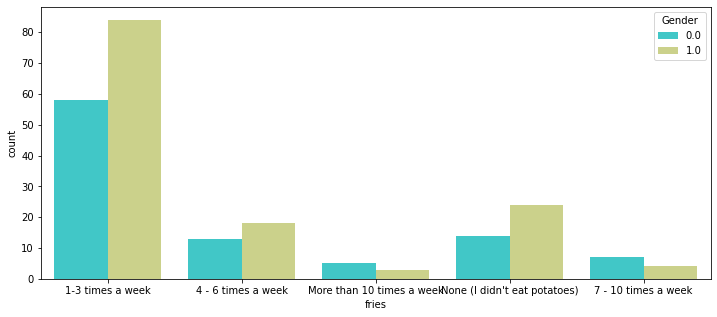

In [19]:
plt.figure(figsize=(12,5))
sns.countplot(x='fries',data=df, palette='rainbow',hue='Gender')#male=0,female=1

<AxesSubplot:xlabel='smoke', ylabel='count'>

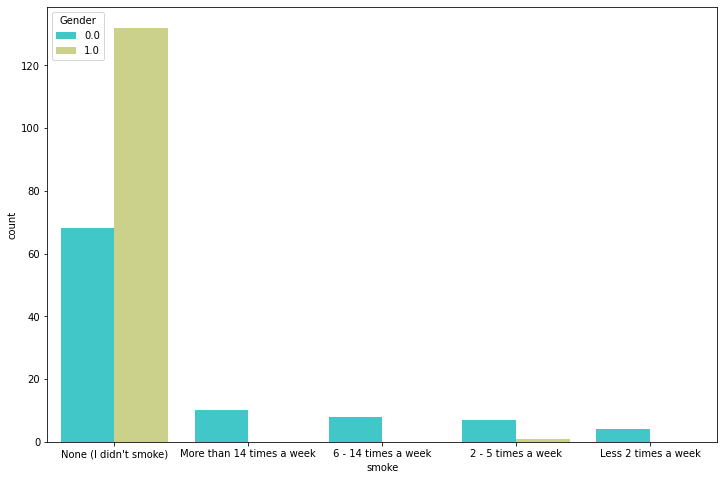

In [20]:
plt.figure(figsize=(12,8))
sns.countplot(x='smoke',data=df, palette='rainbow',hue='Gender')#male=0,female=1

<AxesSubplot:xlabel='smoke', ylabel='count'>

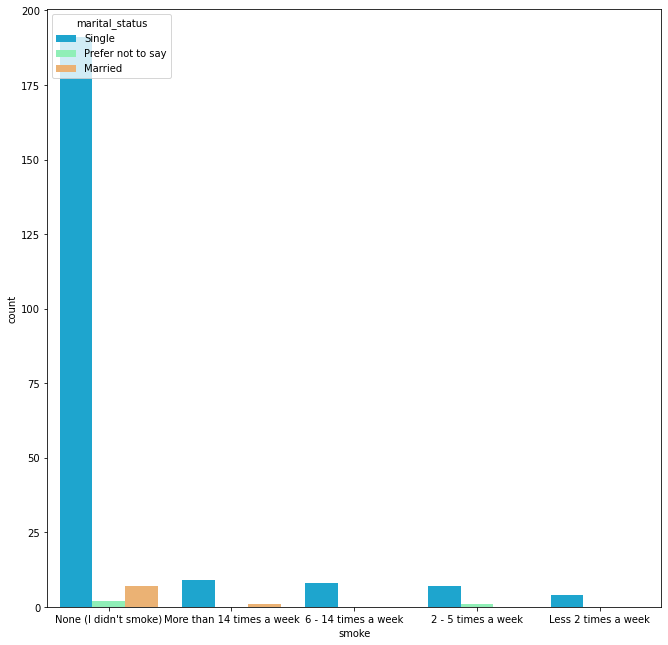

In [21]:
plt.figure(figsize=(11,11))
sns.countplot(x='smoke',data=df, palette='rainbow',hue='marital_status')#male=0,female=1

<AxesSubplot:xlabel='fbl', ylabel='count'>

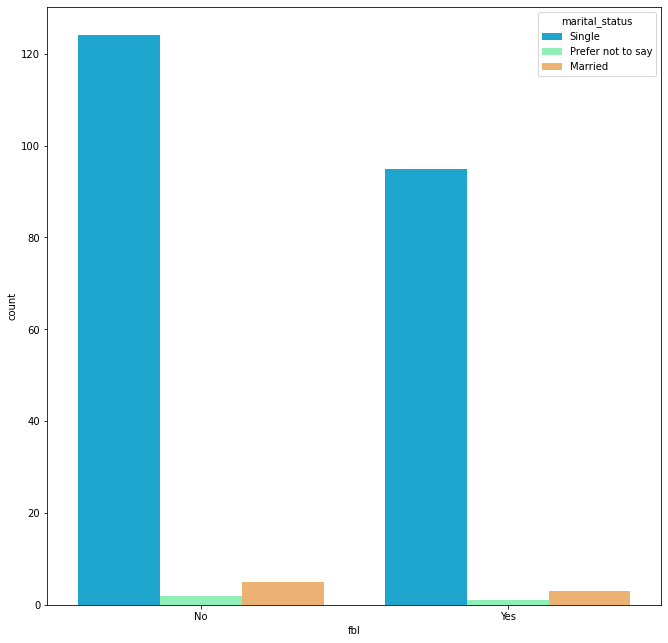

In [22]:
plt.figure(figsize=(11,11))
sns.countplot(x='fbl',data=df, palette='rainbow',hue='marital_status')#male=0,female=1

<AxesSubplot:xlabel='nat_fruit_juice', ylabel='count'>

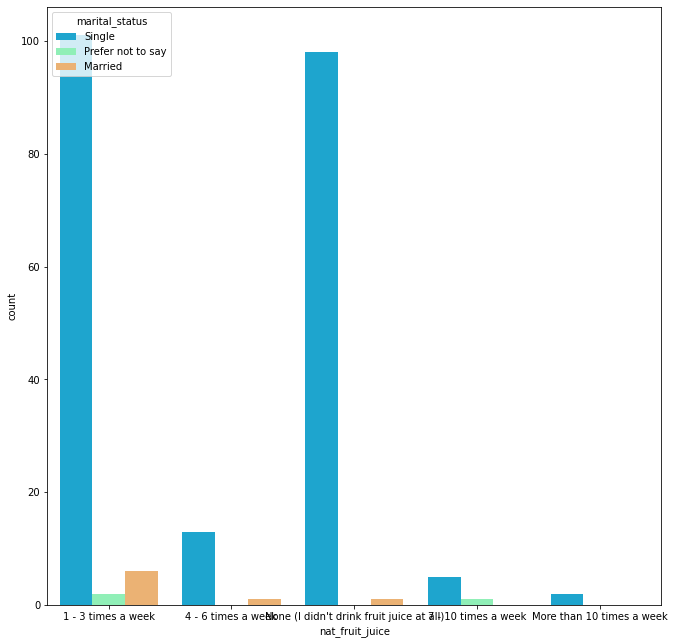

In [23]:
plt.figure(figsize=(11,11))
sns.countplot(x='nat_fruit_juice',data=df, palette='rainbow',hue='marital_status')#male=0,female=1

<AxesSubplot:xlabel=' vegetables', ylabel='count'>

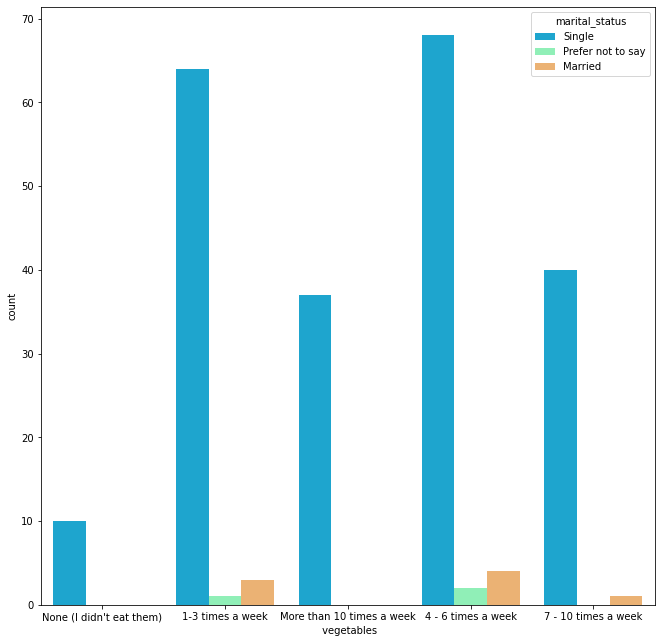

In [24]:
plt.figure(figsize=(11,11))
sns.countplot(x=' vegetables',data=df, palette='rainbow',hue='marital_status')#male=0,female=1

<AxesSubplot:xlabel='fbl', ylabel='count'>

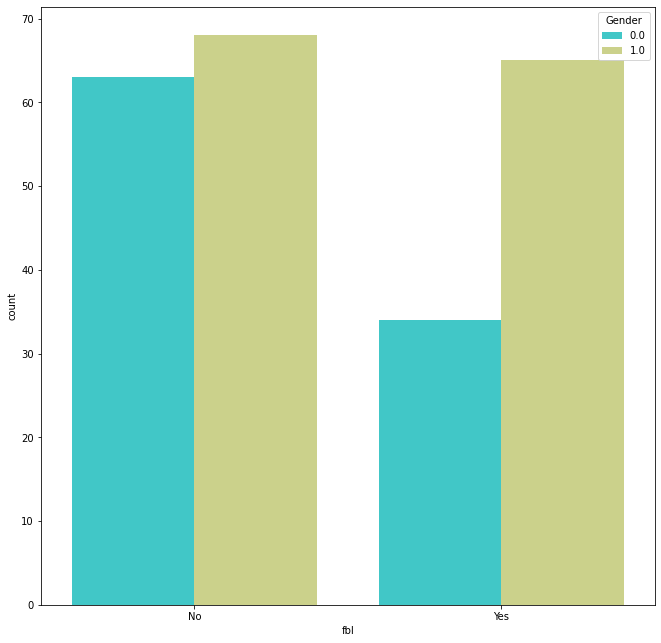

In [25]:
plt.figure(figsize=(11,11))
sns.countplot(x='fbl',data=df, palette='rainbow',hue='Gender')#male=0,female=1

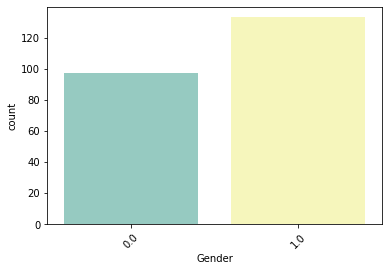

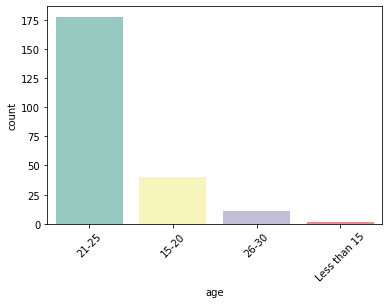

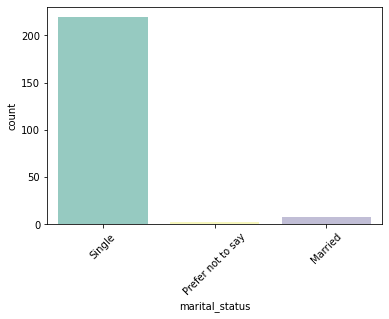

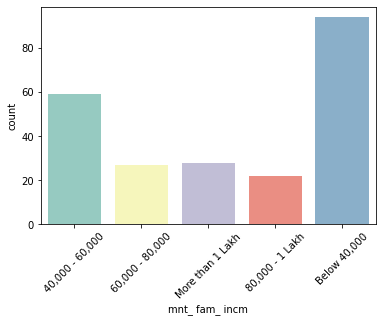

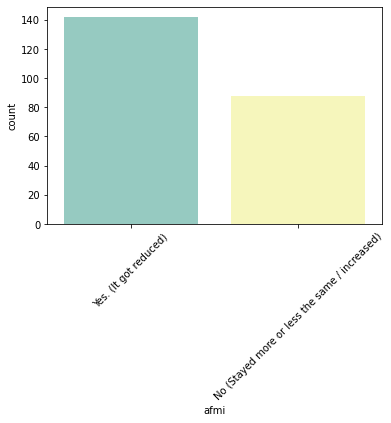

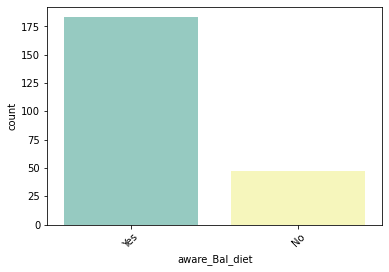

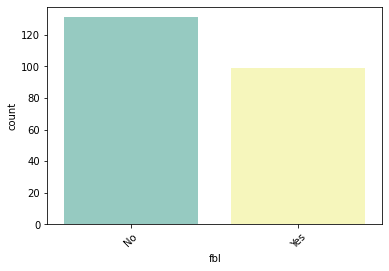

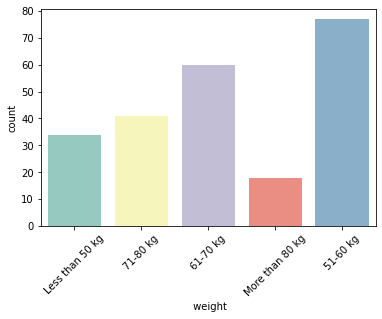

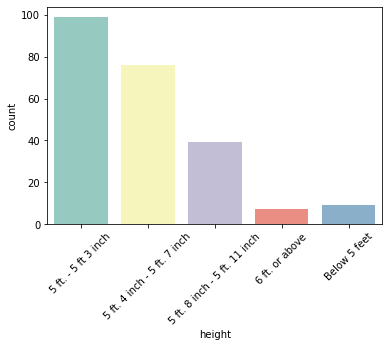

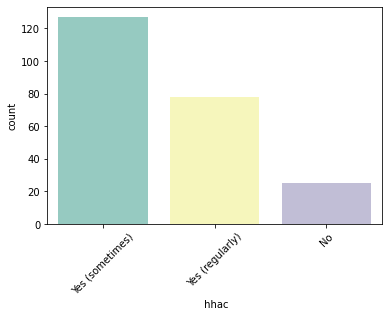

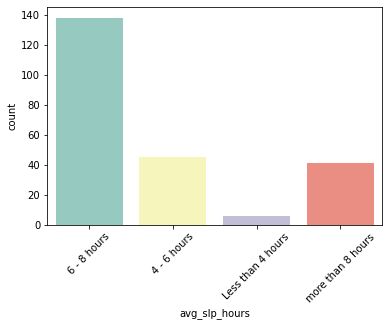

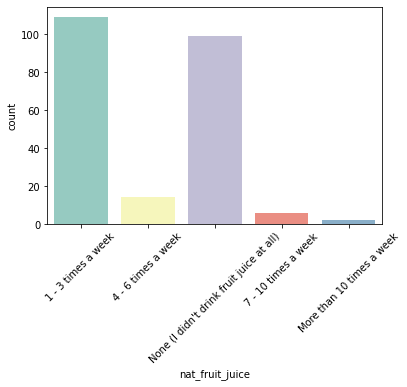

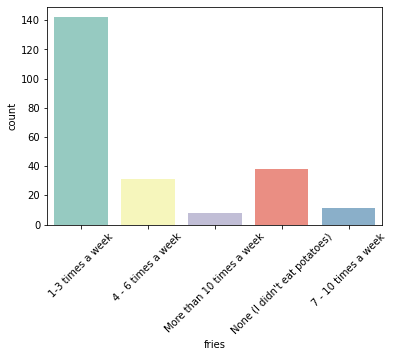

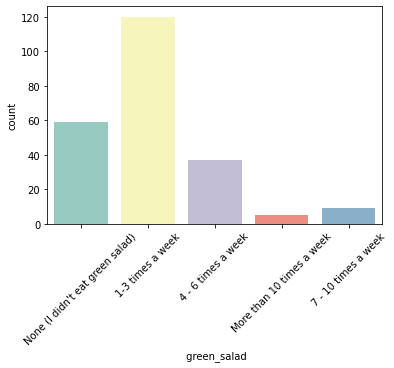

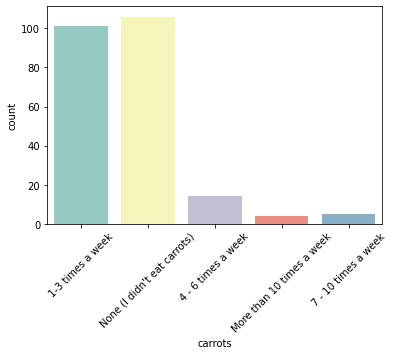

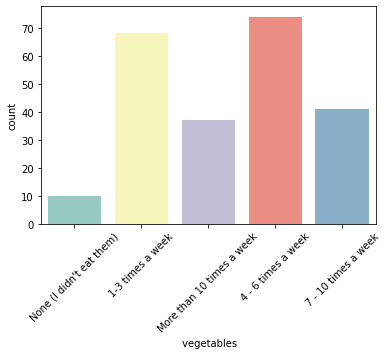

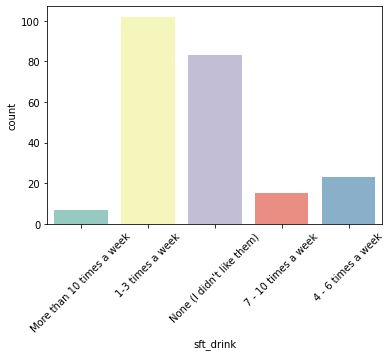

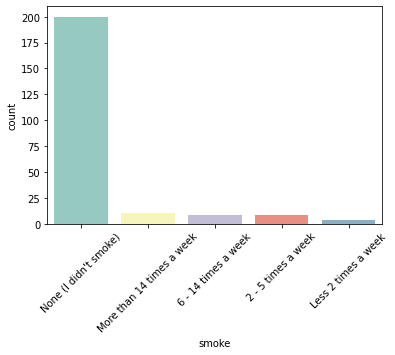

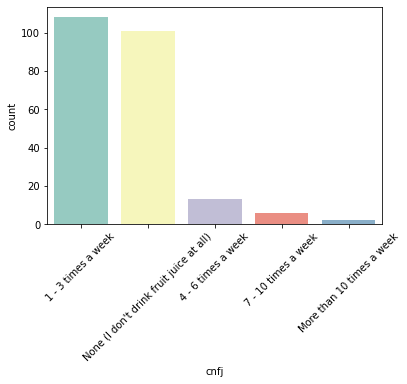

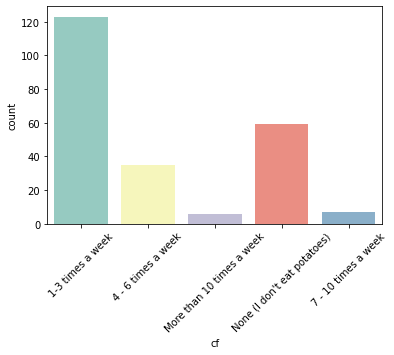

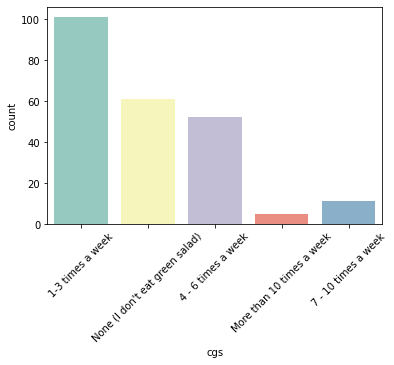

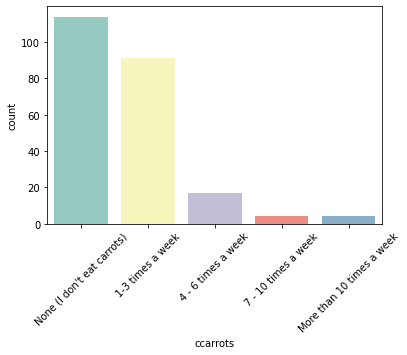

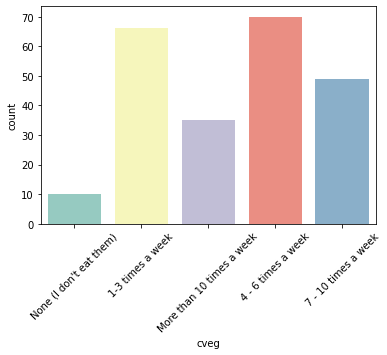

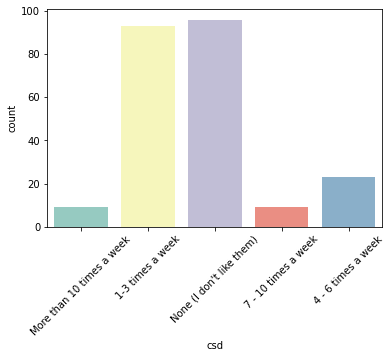

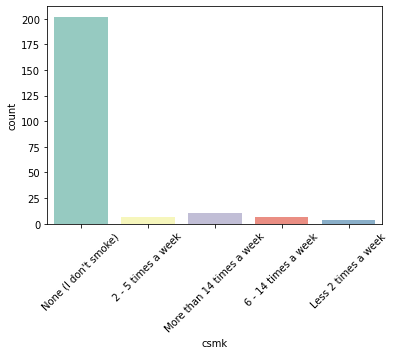

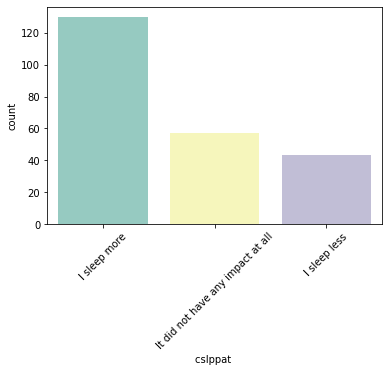

In [26]:
# Looping through all the categorical features by our y variable - see if there is relationship

features = ['Gender', 'age', 'marital_status', 'mnt_ fam_ incm', 'afmi',
       'aware_Bal_diet', 'fbl', ' weight', 'height', ' hhac', 'avg_slp_hours',
       'nat_fruit_juice', 'fries', ' green_salad', 'carrots', ' vegetables',
       'sft_drink', 'smoke', 'cnfj', 'cf', 'cgs', 'ccarrots', 'cveg', 'csd',
       'csmk', 'cslppat ']

for f in features:
    sns.countplot(x = f, data = df, palette = 'Set3')
    plt.xticks(rotation=45)
    plt.show()

In [27]:
# giving a numeric representation to categorical variables
print(df.shape)
raw_data = df[features]
print(raw_data.shape)
# Making categorical variables into numeric representation
new_raw_data = pd.get_dummies(raw_data, columns = features)

# Notes:
# We can also do this with Label Encoding and OneHotEncoder from the preprocessing library

print(new_raw_data.shape)
# print the shape

new_raw_data.head()

(230, 26)
(230, 26)
(230, 110)


,Gender_0.0,Gender_1.0,age_15-20,age_21-25,age_26-30,age_Less than 15,marital_status_Married,marital_status_Prefer not to say,marital_status_Single,"mnt_ fam_ incm_40,000 - 60,000",...,csd_More than 10 times a week,csd_None (I don't like them),csmk_2 - 5 times a week,csmk_6 - 14 times a week,csmk_Less 2 times a week,csmk_More than 14 times a week,csmk_None (I don't smoke),cslppat _I sleep less,cslppat _I sleep more,cslppat _It did not have any impact at all
0,1,0,0,1,0,0,0,0,1,1,...,1,0,0,0,0,0,1,0,1,0
1,1,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
2,1,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
4,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
5,0,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0


In [28]:
raw_data.head()

,Gender,age,marital_status,mnt_ fam_ incm,afmi,aware_Bal_diet,fbl,weight,height,hhac,...,sft_drink,smoke,cnfj,cf,cgs,ccarrots,cveg,csd,csmk,cslppat
0,0.0,21-25,Single,"40,000 - 60,000",Yes. (It got reduced),Yes,No,Less than 50 kg,5 ft. - 5 ft 3 inch,Yes (sometimes),...,More than 10 times a week,None (I didn't smoke),1 - 3 times a week,1-3 times a week,1-3 times a week,None (I don't eat carrots),None (I don't eat them),More than 10 times a week,None (I don't smoke),I sleep more
1,0.0,21-25,Single,"60,000 - 80,000",Yes. (It got reduced),Yes,No,71-80 kg,5 ft. 4 inch - 5 ft. 7 inch,Yes (sometimes),...,1-3 times a week,None (I didn't smoke),None (I don't drink fruit juice at all),4 - 6 times a week,None (I don't eat green salad),None (I don't eat carrots),1-3 times a week,1-3 times a week,None (I don't smoke),I sleep more
2,0.0,21-25,Single,"60,000 - 80,000",Yes. (It got reduced),Yes,Yes,61-70 kg,5 ft. 8 inch - 5 ft. 11 inch,Yes (sometimes),...,1-3 times a week,None (I didn't smoke),1 - 3 times a week,More than 10 times a week,1-3 times a week,1-3 times a week,More than 10 times a week,1-3 times a week,None (I don't smoke),It did not have any impact at all
4,0.0,15-20,Single,More than 1 Lakh,Yes. (It got reduced),Yes,No,More than 80 kg,5 ft. 8 inch - 5 ft. 11 inch,Yes (regularly),...,1-3 times a week,None (I didn't smoke),1 - 3 times a week,1-3 times a week,4 - 6 times a week,1-3 times a week,4 - 6 times a week,1-3 times a week,None (I don't smoke),I sleep more
5,1.0,15-20,Single,More than 1 Lakh,No (Stayed more or less the same / increased),Yes,Yes,Less than 50 kg,5 ft. - 5 ft 3 inch,Yes (sometimes),...,1-3 times a week,None (I didn't smoke),4 - 6 times a week,1-3 times a week,4 - 6 times a week,1-3 times a week,4 - 6 times a week,1-3 times a week,None (I don't smoke),I sleep more


# Feature Scaling

In [29]:
#Let's check if any feature requires scaling
scale_vars = []
for f in new_raw_data.columns:
    if new_raw_data[f].max() > 1:
        scale_vars.append(f)
scale_vars

[]

# KMeans

In [30]:
# We will start with 5 clusters

kmeans = KMeans(n_clusters=5, random_state=540)
kmeans = kmeans.fit(new_raw_data)

# Prints the clusters it assigned to each observation
print("The clusters are: ", kmeans.labels_)


# Prints the Inertia
print("The Inertia is: ", kmeans.inertia_)

The clusters are:  [4 1 4 4 3 0 4 4 0 0 3 2 4 1 1 1 4 2 3 3 1 0 0 0 4 2 1 1 3 1 1 4 4 4 1 1 2
 0 0 2 2 1 2 4 4 1 0 1 4 4 2 1 4 2 2 0 4 2 1 3 0 4 1 2 3 2 3 0 0 0 2 0 3 1
 2 0 1 3 1 4 3 2 3 4 2 2 4 0 4 3 3 4 4 4 3 3 3 2 1 1 0 4 4 2 1 0 3 1 1 0 2
 0 3 3 2 2 2 1 1 2 3 3 1 2 2 3 0 4 3 0 3 2 2 1 4 4 3 3 3 3 3 3 3 3 2 1 1 2
 3 3 0 1 3 1 2 2 2 4 2 3 0 1 3 3 4 1 2 2 0 2 2 0 1 1 2 1 4 1 1 3 0 4 0 4 1
 4 4 4 0 0 4 0 1 1 3 0 3 2 3 1 3 3 2 1 1 3 2 3 3 3 1 1 1 1 2 2 2 1 2 2 4 2
 4 3 0 2 2 4 2 0]
The Inertia is:  2797.1695539754355


In [31]:
kmeans.labels_.shape

(230,)

In [32]:
kmeans.cluster_centers_

array([[ 3.71428571e-01,  6.28571429e-01,  1.71428571e-01,
         7.71428571e-01,  5.71428571e-02, -1.73472348e-18,
         5.71428571e-02,  6.93889390e-18,  9.42857143e-01,
         2.28571429e-01,  3.14285714e-01,  1.42857143e-01,
         1.42857143e-01,  1.71428571e-01,  7.42857143e-01,
         2.57142857e-01,  5.71428571e-02,  9.42857143e-01,
         1.42857143e-01,  8.57142857e-01,  3.14285714e-01,
         3.14285714e-01,  2.57142857e-01,  8.57142857e-02,
         2.85714286e-02,  4.28571429e-01,  3.71428571e-01,
         1.42857143e-01,  5.71428571e-02,  0.00000000e+00,
        -2.77555756e-17,  5.14285714e-01,  4.85714286e-01,
         1.71428571e-01,  7.42857143e-01,  1.38777878e-17,
         8.57142857e-02,  5.42857143e-01,  1.42857143e-01,
         5.71428571e-02, -3.46944695e-18,  2.57142857e-01,
         3.42857143e-01,  1.71428571e-01,  2.85714286e-02,
         5.71428571e-02,  4.00000000e-01,  5.14285714e-01,
         4.00000000e-01,  0.00000000e+00,  5.71428571e-0

# Inertia

In [33]:
# How to find the best number of Ks? (Elbow Method)

# Running K means with multiple Ks

no_of_clusters = range(2,20) #[2,3,4,5,6,7,8,9, .... 19]
inertia = []


for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=2)
    kmeans = kmeans.fit(new_raw_data)
    u = kmeans.inertia_
    inertia.append(u)
    print("The inertia for :", f, "Clusters is:", u)

The inertia for : 2 Clusters is: 3070.872050816697
The inertia for : 3 Clusters is: 2957.234684312104
The inertia for : 4 Clusters is: 2868.772188552188
The inertia for : 5 Clusters is: 2797.3735369147657
The inertia for : 6 Clusters is: 2764.031106067547
The inertia for : 7 Clusters is: 2693.5939936047002
The inertia for : 8 Clusters is: 2652.280760600069
The inertia for : 9 Clusters is: 2617.8110383376666
The inertia for : 10 Clusters is: 2581.8235805860813
The inertia for : 11 Clusters is: 2542.9818714960666
The inertia for : 12 Clusters is: 2523.351490932823
The inertia for : 13 Clusters is: 2467.484085359086
The inertia for : 14 Clusters is: 2473.2754301075265
The inertia for : 15 Clusters is: 2428.094363737676
The inertia for : 16 Clusters is: 2424.3065843513223
The inertia for : 17 Clusters is: 2367.3324737238354
The inertia for : 18 Clusters is: 2360.2320203583818
The inertia for : 19 Clusters is: 2335.08364696779


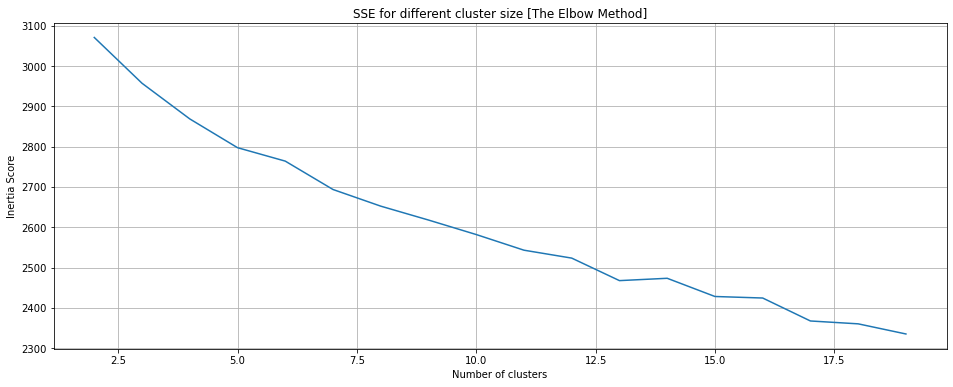

In [34]:
plt.figure(figsize = (16, 6))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia Score')
plt.title('SSE for different cluster size [The Elbow Method]')
plt.plot(no_of_clusters, inertia)
plt.grid(True)
plt.show()

# Clustering Validation Technique (Silhouette)

In [35]:
from sklearn.metrics import silhouette_samples, silhouette_score
avg_silh = []
for n_clusters in no_of_clusters:
    
    clusterer = KMeans(n_clusters=n_clusters, random_state=2)
    cluster_labels = clusterer.fit_predict(new_raw_data)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(new_raw_data, cluster_labels)
    avg_silh.append(silhouette_avg)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(new_raw_data, cluster_labels)
    #plt.figure(figsize = (10,10))
    #sns.boxplot(x = cluster_labels, y = sample_silhouette_values)

    

For n_clusters = 2 The average silhouette_score is : 0.05922869118796037
For n_clusters = 3 The average silhouette_score is : 0.04987441757424328
For n_clusters = 4 The average silhouette_score is : 0.041640976220301565
For n_clusters = 5 The average silhouette_score is : 0.04796955404496894
For n_clusters = 6 The average silhouette_score is : 0.039997613615166176
For n_clusters = 7 The average silhouette_score is : 0.04196374863622683
For n_clusters = 8 The average silhouette_score is : 0.03549712544386894
For n_clusters = 9 The average silhouette_score is : 0.04286788422001685
For n_clusters = 10 The average silhouette_score is : 0.03957414820683463
For n_clusters = 11 The average silhouette_score is : 0.033213959057359896
For n_clusters = 12 The average silhouette_score is : 0.03214703499591759
For n_clusters = 13 The average silhouette_score is : 0.041830200772999364
For n_clusters = 14 The average silhouette_score is : 0.03399755100929132
For n_clusters = 15 The average silhouette

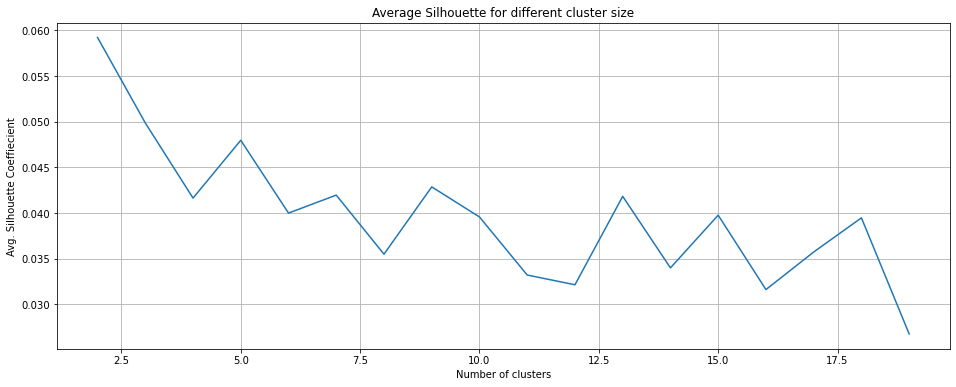

In [36]:
plt.figure(figsize = (16, 6))
plt.xlabel('Number of clusters')
plt.ylabel('Avg. Silhouette Coeffiecient')
plt.title('Average Silhouette for different cluster size')
plt.plot(no_of_clusters, avg_silh)
plt.grid()
plt.show()